(40, 2)
(40,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


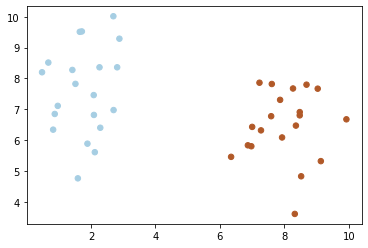

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create 40 separable points
X,y = make_blobs(n_samples = 40, centers = 2, random_state = 20)
# make_blobs: Generate isotropic Gaussian blobs for clustering.

print(X.shape)
print(y.shape)
print(type(X))
print(type(y))


# fit the model, do not regularize for illustration purpose
clf = svm.SVC(kernel='linear',C=1)
# Cfloat, default=1.0
# Regularization parameter

clf.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)
plt.show()

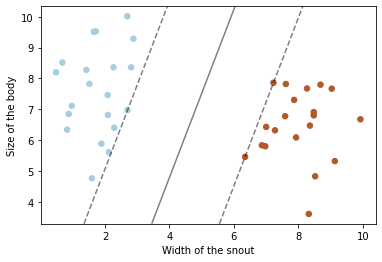

In [28]:
clf = svm.SVC(kernel='linear',C=1000)
clf.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)
plt.show   # we need to ingore the () here, or we will have two seperate plots


# plot the decision function
ax = plt.gca()
# gca() used to get the current Axes instance on the current figure 

xlim=ax.get_xlim()
ylim=ax.get_ylim()

# get_xlim: Return the x-axis view limits.


# create grid to evaluate model
xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)

YY,XX = np.meshgrid(yy,xx)
# meshgrid: Return coordinate matrices from coordinate vectors.

xy = np.vstack([XX.ravel(),YY.ravel()]).T
# np.vstack(): Stack arrays in sequence vertically (row wise).
# a  = np.array([1, 2, 3]), b = np.array([4, 5, 6])
# np.vstack(a,b) = array([[1],
#                        [2],
#                        [3],
#                        [4],
#                        [5],
#                        [6]])


# np.ravel(): Return a contiguous flattened array.
# Return a contiguous flattened array.
# np.ravel(x)
# output: array([1, 2, 3, 4, 5, 6])


Z=clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX,YY,Z,colors = 'k',levels =[-1,0,1],alpha=0.5,
           linestyles=['--','-','--'])

# plot suppport vectors
ax.scatter(clf.support_vectors_[:,0],
           clf.support_vectors_[:,1],s=100,
           linewidth=1,facecolors='none')
plt.xlabel("Width of the snout")
plt.ylabel("Size of the body")
plt.show()